In [1]:
!pip install google-play-scraper
!pip install app-store-scraper
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: reque

In [2]:
from google_play_scraper import reviews_all, Sort
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import uuid

g_reviews = reviews_all(
    "com.bca.mybca.omni.android",
    sleep_milliseconds=500,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
)

a_reviews = AppStore('id', 'mybca', '1440241902')
a_reviews.review()

g_df = pd.DataFrame(np.array(g_reviews), columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'}, inplace=True)
g_df2.rename(
    columns={
        'score': 'rating',
        'userName': 'user_name',
        'reviewId': 'review_id',
        'content': 'review_description',
        'at': 'review_date',
    },
    inplace=True,
)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)

a_df = pd.DataFrame(np.array(a_reviews.reviews), columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'}, inplace=True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(
    columns={
        'review': 'review_description',
        'userName': 'user_name',
        'date': 'review_date',
        'title': 'review_title',
    },
    inplace=True,
)
a_df2 = a_df2.where(pd.notnull(a_df2), None)

columns_to_keep = ['source', 'user_name', 'review_description', 'review_date']

g_df2['review_date'] = pd.to_datetime(g_df2['review_date'])
a_df2['review_date'] = pd.to_datetime(a_df2['review_date'])

g_filtered = g_df2[g_df2['review_date'].dt.year == 2024]
a_filtered = a_df2[a_df2['review_date'].dt.year == 2024]

g_limited = g_filtered.head(1000)
a_limited = a_filtered.head(1000)

result = pd.concat([g_limited[columns_to_keep], a_limited[columns_to_keep]])

result.to_csv('reviews_2024_limited.csv', index=False, encoding='utf-8')

ERROR:Base:Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/id/apps/1440241902/reviews?l=en-GB&offset=2000&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))


In [3]:
data = pd.read_csv('reviews_2024_limited.csv')
data.head()

,source,user_name,review_description,review_date
0,Google Play,Pengguna Google,Semua ok,2024-11-20 06:36:37
1,Google Play,Pengguna Google,sangat membantu,2024-11-20 05:09:50
2,Google Play,Pengguna Google,Aplikasi bagus ini Keselnya cuman minta update...,2024-11-20 03:47:31
3,Google Play,Pengguna Google,Sering terjadi kesalahan. Mintak konfrmasi no ...,2024-11-20 00:42:18
4,Google Play,Pengguna Google,aksesbilitas udh dimatiin sudah versi terbaru ...,2024-11-19 22:12:49


In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1OF2-ZWfAwSIr0UQKhROud152CnWibmxXTHoe4ZbbOCU#gid=0


In [5]:
import pandas as pd

!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator

import textblob
from textblob import TextBlob

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=054ec4885a6cef734f7bad05112971153e97766a4dcc796cf14e86a90db6cc54
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.7
    Uninstalling httpcore-1.0.7:
      Success

In [6]:
data = pd.read_csv('reviews_2024_limited.csv')
data = pd.DataFrame(data)
data.head()

,source,user_name,review_description,review_date
0,Google Play,Pengguna Google,Semua ok,2024-11-20 06:36:37
1,Google Play,Pengguna Google,sangat membantu,2024-11-20 05:09:50
2,Google Play,Pengguna Google,Aplikasi bagus ini Keselnya cuman minta update...,2024-11-20 03:47:31
3,Google Play,Pengguna Google,Sering terjadi kesalahan. Mintak konfrmasi no ...,2024-11-20 00:42:18
4,Google Play,Pengguna Google,aksesbilitas udh dimatiin sudah versi terbaru ...,2024-11-19 22:12:49


In [7]:
data['clean_text'] = data['review_description'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')
data['clean_text'] = data['clean_text'].str.lower()

In [8]:
data.to_csv('reviews_2024_lowercase.csv', index=False, encoding='utf-8')
data.head()

,source,user_name,review_description,review_date,clean_text
0,Google Play,Pengguna Google,Semua ok,2024-11-20 06:36:37,semua ok
1,Google Play,Pengguna Google,sangat membantu,2024-11-20 05:09:50,sangat membantu
2,Google Play,Pengguna Google,Aplikasi bagus ini Keselnya cuman minta update...,2024-11-20 03:47:31,aplikasi bagus ini keselnya cuman minta update...
3,Google Play,Pengguna Google,Sering terjadi kesalahan. Mintak konfrmasi no ...,2024-11-20 00:42:18,sering terjadi kesalahan. mintak konfrmasi no ...
4,Google Play,Pengguna Google,aksesbilitas udh dimatiin sudah versi terbaru ...,2024-11-19 22:12:49,aksesbilitas udh dimatiin sudah versi terbaru ...


In [9]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from googletrans import Translator

data = pd.read_csv('reviews_2024_lowercase.csv')

def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    return text

data['clean_text'] = data['review_description'].apply(clean_text)

translator = Translator()

df = pd.DataFrame(data.clean_text)
translations = {}

for column in df.columns:
    unique_elements = df[column].unique()
    for element in unique_elements:
        translations[element] = translator.translate(element).text

In [10]:
data['translated_text'] = df.replace(translations)

data['translated_text'] = data['translated_text'].str.lower()

data['translated_text'] = data['translated_text'].str.replace('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ')
data['translated_text'] = data['translated_text'].str.lower()

In [11]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['stemmed_text'] = data['translated_text'].apply(lambda x: stemmer.stem(x))
data.to_csv('reviews_2024_stemmed.csv', index=False, encoding='utf-8')

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('indonesian')
data = pd.read_csv('reviews_2024_stemmed.csv')

with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def remove_stopwords(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word not in stopwords])
    return ''

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

data = pd.read_csv('reviews_2024_stemmed.csv')

data['stemmed_text'] = data['stemmed_text'].fillna('').astype(str)

data['cleaned_text'] = data['stemmed_text'].apply(remove_stopwords)
data['final_cleaned_text'] = data['cleaned_text'].apply(remove_punctuation)

data.to_csv('reviews_2024_final_cleaned.csv', index=False, encoding='utf-8')

print("Pembersihan selesai. File disimpan sebagai 'reviews_2024_final_cleaned.csv'")


Pembersihan selesai. File disimpan sebagai 'reviews_2024_final_cleaned.csv'


In [15]:
from textblob import TextBlob
data = pd.read_csv('reviews_2024_final_cleaned.csv')

data['final_cleaned_text'] = data['final_cleaned_text'].fillna('')

def subjektivitas(tr_text):
    return TextBlob(tr_text).sentiment.subjectivity

def polaritas(tr_text):
    return TextBlob(tr_text).sentiment.polarity

def hasilSentimen(nilai):
    if nilai > 0:
        return 'positif'
    else:
        return 'negatif'

data['subjektivitas'] = data['final_cleaned_text'].apply(subjektivitas)
data['polaritas'] = data['final_cleaned_text'].apply(polaritas)
data['sentimen'] = data['polaritas'].apply(hasilSentimen)

positive_samples = data[data['sentimen'] == 'positif'].sample(n=600, random_state=42)
negative_samples = data[data['sentimen'] == 'negatif']

balanced_data = pd.concat([positive_samples, negative_samples]).reset_index(drop=True)

balanced_data['sentimen'].value_counts()

data.head()


,source,user_name,review_description,review_date,clean_text,translated_text,stemmed_text,cleaned_text,final_cleaned_text,subjektivitas,polaritas,sentimen
0,Google Play,Pengguna Google,Semua ok,2024-11-20 06:36:37,Semua ok,everything is ok,everything is ok,everything is ok,everything is ok,0.500000,0.500000,positif
1,Google Play,Pengguna Google,sangat membantu,2024-11-20 05:09:50,sangat membantu,very helpful,very helpful,very helpful,very helpful,0.300000,0.200000,positif
2,Google Play,Pengguna Google,Aplikasi bagus ini Keselnya cuman minta update...,2024-11-20 03:47:31,Aplikasi bagus ini Keselnya cuman minta update...,this is a good application. the only problem i...,this is a good application the only problem is...,this is a good application the only problem is...,this is a good application the only problem is...,0.733333,0.466667,positif
3,Google Play,Pengguna Google,Sering terjadi kesalahan. Mintak konfrmasi no ...,2024-11-20 00:42:18,Sering terjadi kesalahan Mintak konfrmasi no ...,errors often occur. asking for confirmation of...,errors often occur asking for confirmation of ...,errors often occur asking for confirmation of ...,errors often occur asking for confirmation of ...,1.000000,0.250000,positif
4,Google Play,Pengguna Google,aksesbilitas udh dimatiin sudah versi terbaru ...,2024-11-19 22:12:49,aksesbilitas udh dimatiin sudah versi terbaru ...,"accessibility has been turned off, it's the la...",accessibility has been turned off it s the lat...,accessibility has been turned off it s the lat...,accessibility has been turned off it s the lat...,0.900000,0.000000,negatif


In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1lRstLE40KBuhUBb9Ia413h96-zcB0VOaFB62nh2CFVs#gid=0


In [17]:
data['sentimen'].value_counts()

,count
sentimen,
negatif,1128
positif,815


In [18]:
data.count()

,0
source,1943
user_name,1943
review_description,1943
review_date,1943
clean_text,1943
translated_text,1940
stemmed_text,1939
cleaned_text,1939
final_cleaned_text,1943
subjektivitas,1943


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [20]:
!pip install Sastrawi
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
data.drop(columns=[ 'source', 'review_description', 'user_name', 'translated_text', 'subjektivitas', 'polaritas', 'stemmed_text', 'cleaned_text', 'review_date', 'final_cleaned_text'], inplace=True)

data.to_csv('myBca.csv', index=False, encoding='utf-8')


In [22]:
data.info()
data.head()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  1943 non-null   object
 1   sentimen    1943 non-null   object
dtypes: object(2)
memory usage: 30.5+ KB


,0
clean_text,1943
sentimen,1943


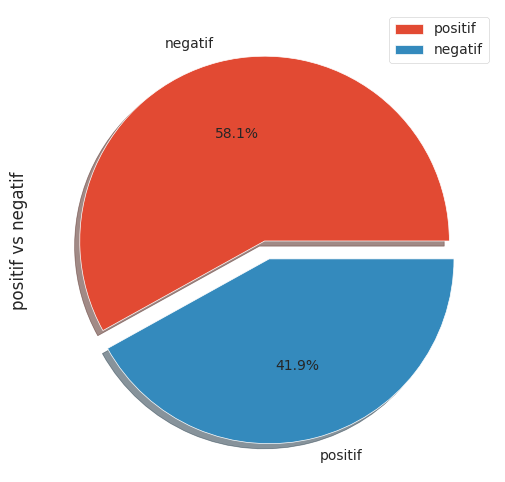

In [23]:
data['sentimen'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6,6), autopct = '%1.1f%%', shadow = True)
plt.ylabel('positif vs negatif')
plt.legend(['positif', 'negatif'])
plt.show()

In [24]:
from wordcloud import WordCloud

data['length'] = data['clean_text'].apply(len)
data.head()

,clean_text,sentimen,length
0,Semua ok,positif,8
1,sangat membantu,positif,15
2,Aplikasi bagus ini Keselnya cuman minta update...,positif,81
3,Sering terjadi kesalahan Mintak konfrmasi no ...,positif,92
4,aksesbilitas udh dimatiin sudah versi terbaru ...,negatif,127


In [25]:
df['textLength'] = df['clean_text'].apply(len)
df['textLength'].describe()

,textLength
count,1943.000000
mean,106.889346
std,103.191760
min,1.000000
25%,36.000000
50%,78.000000
75%,144.000000
max,908.000000


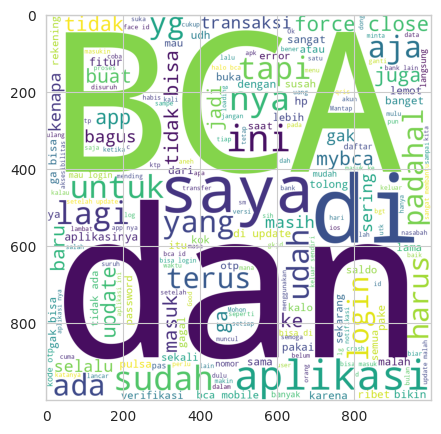

In [26]:
wc=WordCloud(background_color='white', width=1000, height=1000).generate(' '.join(df['clean_text']))
plt.figure(figsize =(5,5))
plt.imshow(wc)